# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [160]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [161]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [162]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | ubinskoye
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | maysville
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | the dalles
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | qamdo
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | dagomys
Processing Record 18 of Set 1 | oakley
Processing Record 19 of Set 1 | shira
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | medina


In [163]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [164]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,69.91,50,31,8.12,AU,1714972578
1,albany,42.6001,-73.9662,52.74,82,100,1.01,US,1714972541
2,whitehorse,60.7161,-135.0538,41.77,86,75,17.27,CA,1714972579
3,qaqortoq,60.7167,-46.0333,29.95,64,0,4.94,GL,1714972579
4,ubinskoye,55.3068,79.6802,44.67,41,2,17.60,RU,1714972579


In [165]:
# Export the City_Data into a csv
city_data_df.to_csv("C://Users//cdj3e//vu_bootcamp//python-api-challenge//WeatherPy//output_data//cities.csv", index_label="City_ID")

In [166]:
# Read saved data
city_data_df = pd.read_csv("C://Users//cdj3e//vu_bootcamp//python-api-challenge//WeatherPy//output_data//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,69.91,50,31,8.12,AU,1714972578
1,albany,42.6001,-73.9662,52.74,82,100,1.01,US,1714972541
2,whitehorse,60.7161,-135.0538,41.77,86,75,17.27,CA,1714972579
3,qaqortoq,60.7167,-46.0333,29.95,64,0,4.94,GL,1714972579
4,ubinskoye,55.3068,79.6802,44.67,41,2,17.60,RU,1714972579


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

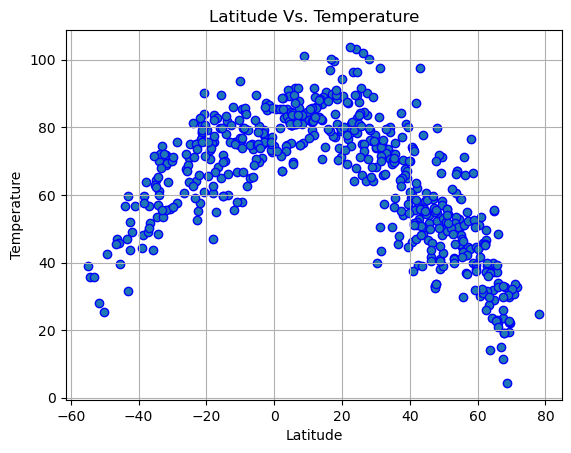

In [167]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude,
            temperature,
           edgecolor="blue", linewidth=1, marker="o",
           alpha=1.0, label="Temperature")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C://Users//cdj3e//vu_bootcamp//python-api-challenge//WeatherPy//output_data//LatitudevTemperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

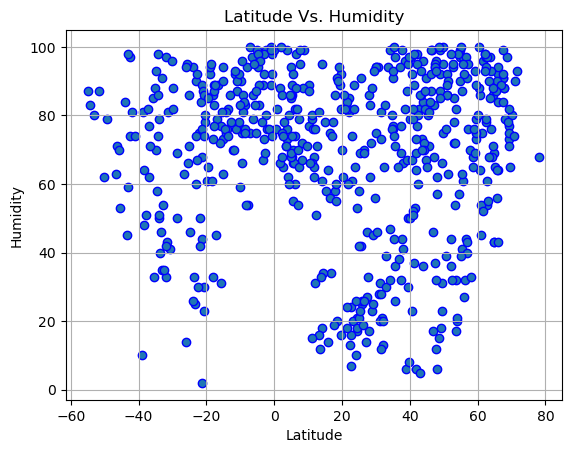

In [168]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(latitude,
            humidity,
           edgecolor="blue", linewidth=1, marker="o",
           alpha=1.0, label="Humidity")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C://Users//cdj3e//vu_bootcamp//python-api-challenge//WeatherPy//output_data//LatitudevHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

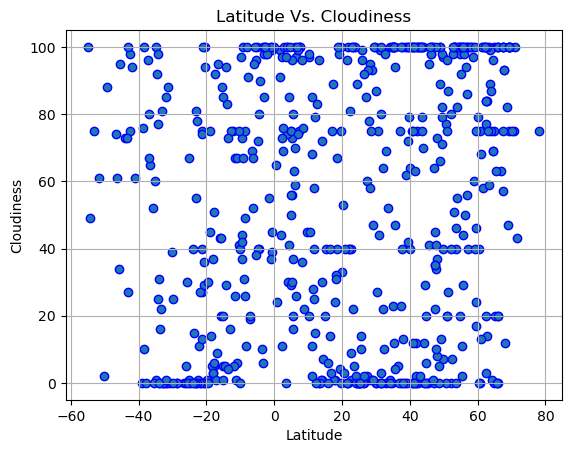

In [169]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude,
            cloudiness,
           edgecolor="blue", linewidth=1, marker="o",
           alpha=1.0, label="Cloudiness")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C://Users//cdj3e//vu_bootcamp//python-api-challenge//WeatherPy//output_data//LatitudevCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

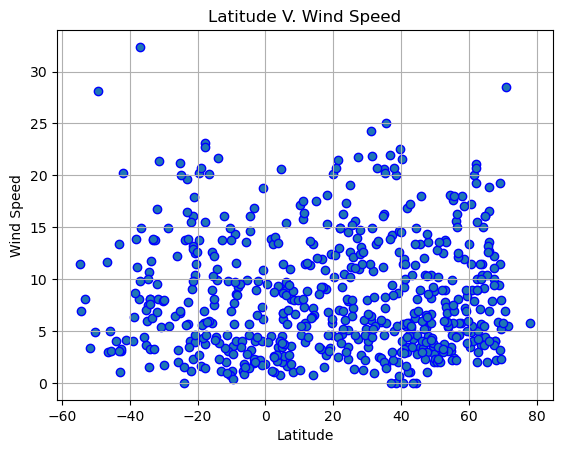

In [170]:
# Build the scatter plots for latitude vs.wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitude,
            wind_speed,
           edgecolor="blue", linewidth=1, marker="o",
           alpha=1.0, label="Wind Speed")

# Incorporate the other graph properties
plt.title("Latitude V. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C://Users//cdj3e//vu_bootcamp//python-api-challenge//WeatherPy//output_data//LatitudevWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [171]:
# Define a function to create Linear Regression plots
# x = latitude
# y = other variable
# slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
# regress = x * slope + intercept
# m = str(round(slope,2))
# b = str(round(intercept,2))
# line = "y = " + m + "x+" b

In [172]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nh_lat_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
nh_lat_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,52.74,82,100,1.01,US,1714972541
2,whitehorse,60.7161,-135.0538,41.77,86,75,17.27,CA,1714972579
3,qaqortoq,60.7167,-46.0333,29.95,64,0,4.94,GL,1714972579
4,ubinskoye,55.3068,79.6802,44.67,41,2,17.60,RU,1714972579
5,bilibino,68.0546,166.4372,32.77,79,12,2.19,RU,1714972579


In [173]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sh_lat_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
sh_lat_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,69.91,50,31,8.12,AU,1714972578
6,namibe,-15.1961,12.1522,71.82,73,5,7.54,AO,1714972579
11,ushuaia,-54.8000,-68.3000,38.86,87,100,11.50,AR,1714972495
13,west island,-12.1568,96.8225,85.98,70,75,16.11,CC,1714972580
15,waitangi,-43.9535,-176.5597,56.82,84,73,4.00,NZ,1714972580


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8444718635638789


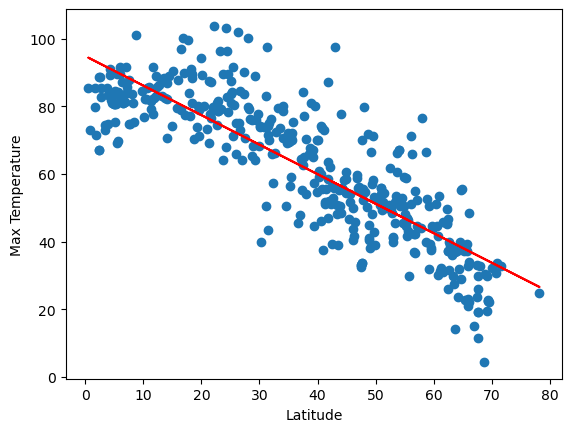

In [174]:
# Linear regression on Northern Hemisphere
x = nh_lat_df['Lat']
y = nh_lat_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f'The r-value is {rvalue}')




    

The r-value is 0.7373288870893152


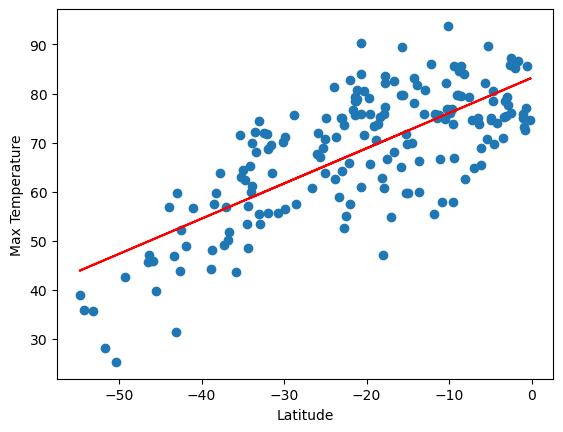

In [175]:
# Linear regression on Southern Hemisphere
x = sh_lat_df['Lat']
y = sh_lat_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f'The r-value is {rvalue}')

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1374259743826395


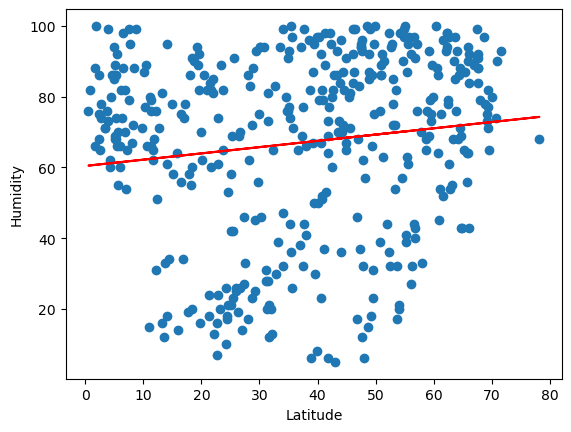

In [176]:
# Northern Hemisphere
x = nh_lat_df['Lat']
y = nh_lat_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is {rvalue}')

The r-value is 0.2911559987582332


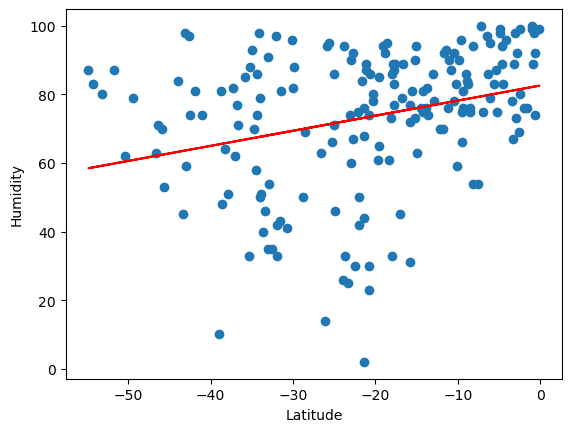

In [177]:
# Southern Hemisphere
x = sh_lat_df['Lat']
y = sh_lat_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is {rvalue}')

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1412437493462102


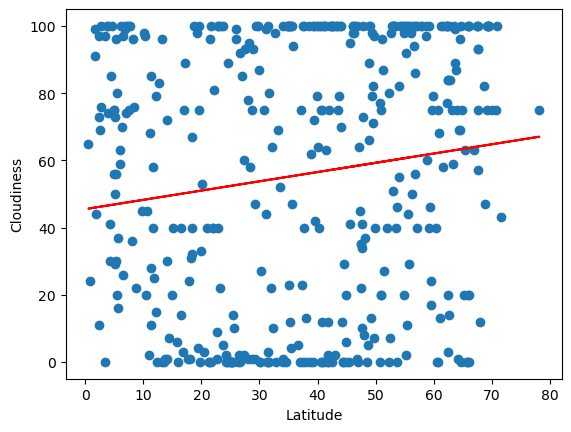

In [178]:
# Northern Hemisphere
x = nh_lat_df['Lat']
y = nh_lat_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is {rvalue}')

The r-value is 0.10919509433335375


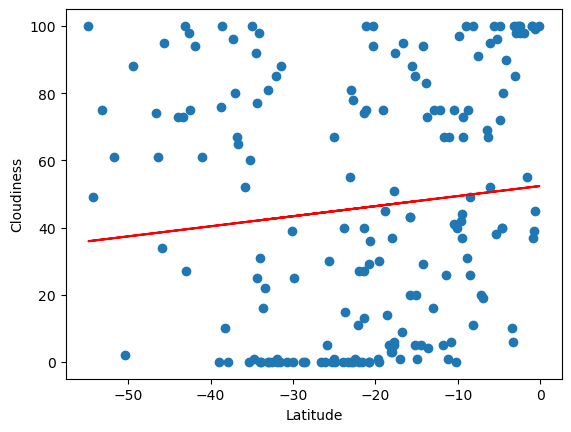

In [179]:
# Southern Hemisphere
x = sh_lat_df['Lat']
y = sh_lat_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is {rvalue}')

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.04997173158693134


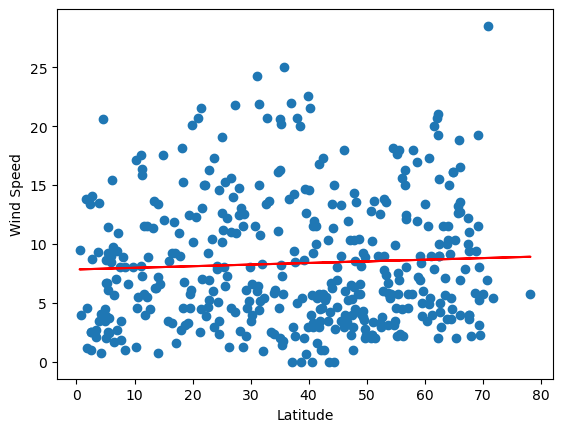

In [180]:
# Northern Hemisphere
x = nh_lat_df['Lat']
y = nh_lat_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is {rvalue}')

The r-value is -0.12939163421846156


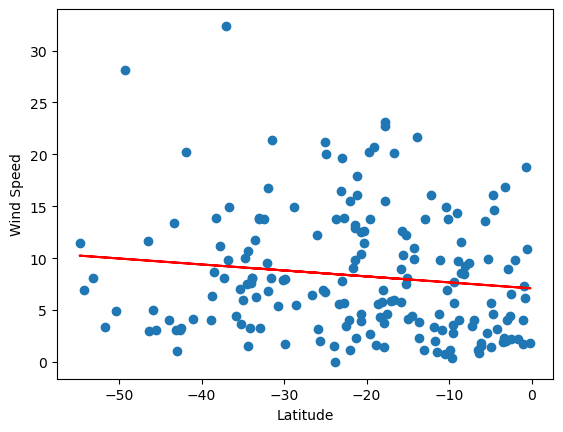

In [181]:
# Southern Hemisphere
x = sh_lat_df['Lat']
y = sh_lat_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
m = str(round(slope,2))
b = str(round(intercept,2))
line = "y="; m; "x+"; b

plt.scatter(x, y)
plt.plot(x, regress, '-r')
plt.annotate(line,(0,-20), fontsize=10, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is {rvalue}')